# Credit Card Fraudulent Transactions

## 1. Kaggle Dataset 

##### Information

- step: represents a unit of time where 1 step equals 1 hour <br>
- type: type of online transaction<br>
- amount: the amount of the transaction<br>
- nameOrig: customer starting the transaction<br>
- oldbalanceOrg: balance before the transaction<br>
- newbalanceOrig: balance after the transaction<br>
- nameDest: recipient of the transaction<br>
- oldbalanceDest: initial balance of recipient before the transaction<br>
- newbalanceDest: the new balance of recipient after the transaction<br>
- isFraud: fraud transaction

In [1]:
import pandas as pd

# Specify the file path
file_path = r"C:\Users\stama\Desktop\Postgraduate Diploma in Science in Data Analytics [PGDDA_JAN23]\Semester 2\Data Mining and Machine Learning 1\PS_20174392719_1491204439457_log.csv"

# Read the CSV file into a DataFrame
df_ = pd.read_csv(file_path)

# Display the first few rows of the dataset
df_.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
df_.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [3]:
#sampling of the dataframe as it is huge an needs computational power which I don't have in my laptop

# Define the fraction of the data you want to sample.
sample_fraction = 0.3

# Create a random sample of the data
df = df_.sample(frac=sample_fraction, random_state=42)  # Using a random state for reproducibility

# Display the first few rows of the sampled dataset
print(df.head())

         step      type      amount     nameOrig  oldbalanceOrg  \
3737323   278   CASH_IN   330218.42   C632336343       20866.00   
264914     15   PAYMENT    11647.08  C1264712553       30370.00   
85647      10   CASH_IN   152264.21  C1746846248      106589.00   
5899326   403  TRANSFER  1551760.63   C333676753           0.00   
2544263   206   CASH_IN    78172.30   C813403091     2921331.58   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3737323       351084.42   C834976624       452419.57       122201.15        0   
264914         18722.92   M215391829            0.00            0.00        0   
85647         258853.21  C1607284477       201303.01        49038.80        0   
5899326            0.00  C1564353608      3198359.45      4750120.08        0   
2544263      2999503.88  C1091768874       415821.90       337649.60        0   

         isFlaggedFraud  
3737323               0  
264914                0  
85647                 0  
589932

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.908786e+06,1.908786e+06,1.908786e+06,1.908786e+06,1.908786e+06,1.908786e+06,1.908786e+06,1.908786e+06
mean,2.434742e+02,1.799722e+05,8.346157e+05,8.560195e+05,1.103267e+06,1.227516e+06,1.275680e-03,3.667252e-06
std,1.423461e+02,6.073136e+05,2.892397e+06,2.928374e+06,3.390895e+06,3.663449e+06,3.569388e-02,1.915004e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.337726e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.483582e+04,1.433935e+04,0.000000e+00,1.327337e+05,2.146038e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.088128e+05,1.074110e+05,1.446915e+05,9.450031e+05,1.113467e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,6.933732e+07,5.731626e+07,4.731626e+07,3.553814e+08,3.560159e+08,1.000000e+00,1.000000e+00


In [5]:
#output_path = r"C:\Users\stama\Desktop\Postgraduate Diploma in Science in Data Analytics [PGDDA_JAN23]\Semester 2\Data Mining and Machine Learning 1\df.csv"

# Export the DataFrame to CSV
#df.to_csv(output_path, index=False)

## 2. Data Preprocessing

### 2.1 Data Overview

In [6]:
# Basic info about the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908786 entries, 3737323 to 1453256
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 174.8+ MB


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### 2.2 Descriptive Statistics


In [7]:
# Descriptive statistics for all columns
stats = df.describe(include='all')
stats

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.908786e+06,1908786,1.908786e+06,1908786,1.908786e+06,1.908786e+06,1908786,1.908786e+06,1.908786e+06,1.908786e+06,1.908786e+06
unique,NaN,5,NaN,1907926,NaN,NaN,1055280,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C2077948692,NaN,NaN,C1899073220,NaN,NaN,NaN,NaN
freq,NaN,670801,NaN,2,NaN,NaN,38,NaN,NaN,NaN,NaN
mean,2.434742e+02,NaN,1.799722e+05,NaN,8.346157e+05,8.560195e+05,NaN,1.103267e+06,1.227516e+06,1.275680e-03,3.667252e-06
std,1.423461e+02,NaN,6.073136e+05,NaN,2.892397e+06,2.928374e+06,NaN,3.390895e+06,3.663449e+06,3.569388e-02,1.915004e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.337726e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.483582e+04,NaN,1.433935e+04,0.000000e+00,NaN,1.327337e+05,2.146038e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.088128e+05,NaN,1.074110e+05,1.446915e+05,NaN,9.450031e+05,1.113467e+06,0.000000e+00,0.000000e+00


Transaction Type (type):<BR>
- There are five unique transaction types.<BR>
- The most frequent transaction type is CASH_OUT, appearing 670,801 times.<BR><BR>
    
    
Amount (amount):<BR>

- The average transaction amount is approximately 179,972.<BR>
- The transaction amounts range from 0 to 69,337,200, with a median of 74,835.82.<BR>
- 75% of the transactions are below 208,812.8.<BR><BR>
    
Origination Account (nameOrig):

There are 1,907,926 unique origin account names.
At least one account name (C2077948692) appears twice, suggesting there might be multiple transactions from the same account.<BR><BR>
    
    
Origination Balance (oldbalanceOrg and newbalanceOrig):

- The average balance before a transaction is approximately 834,615.7, and after a transaction, it's around 856,019.5.
- The maximum origination balance recorded is 57,316,260 before a transaction and 47,316,260 after a transaction.
- Half of the transactions (median) have an origination balance of 14,339.35 before the transaction and go to zero after the transaction.<BR><BR>
    
    
Destination Account (nameDest):<BR>

- There are 1,055,280 unique destination account names.<BR>
- The account C1899073220 is the most frequent recipient, receiving 38 transactions.<BR><BR>
    
    
Destination Balance (oldbalanceDest and newbalanceDest):<BR>

- On average, the balance before receiving a transaction is about 1,103,267, and after receiving, it's about 1,227,516.<BR>
- The maximum recorded balance at the destination is 355,381,400 before a transaction and 356,015,900 after a transaction.<BR><BR>

Fraudulent Transactions (isFraud):<BR>

- Only about 0.1275% of the transactions are marked as fraudulent, indicating a highly imbalanced dataset.<BR>
- The maximum value is 1, which means this column is binary (0 for non-fraudulent and 1 for fraudulent).

### 2.3 Visualizing the Data

##### Distribution of Transaction Types


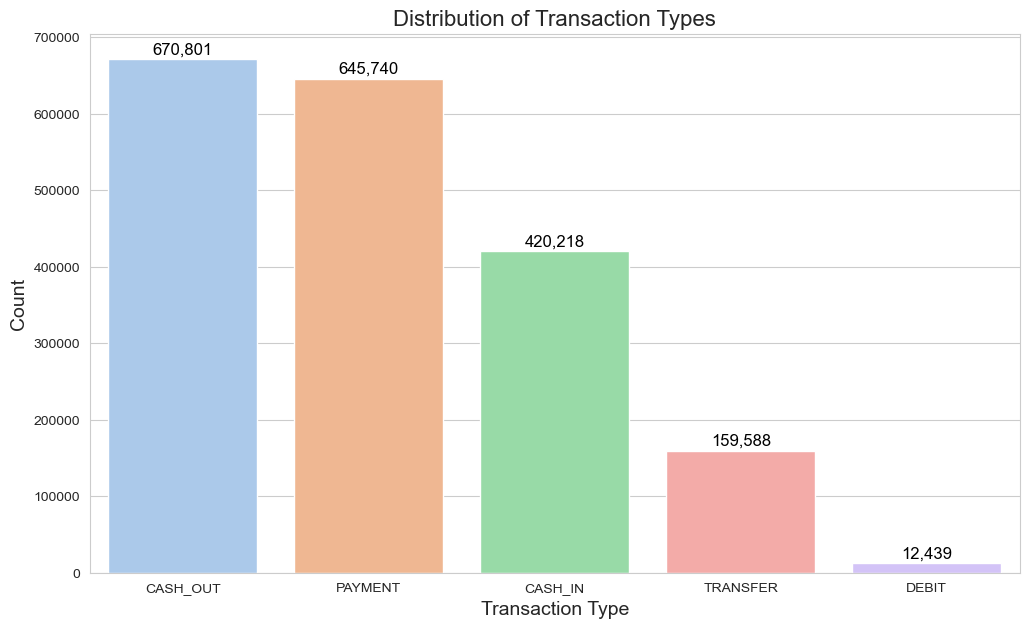

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and palette
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

plt.figure(figsize=(12,7))
ax = sns.countplot(data=df, x='type', palette=palette, order=df['type'].value_counts().index)
plt.title('Distribution of Transaction Types', fontsize=16)
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding annotations to the bars for counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black',
                xytext=(0,7), 
                textcoords='offset points')

plt.show()

##### Distribution of Transaction Amounts (on a Log Scale)

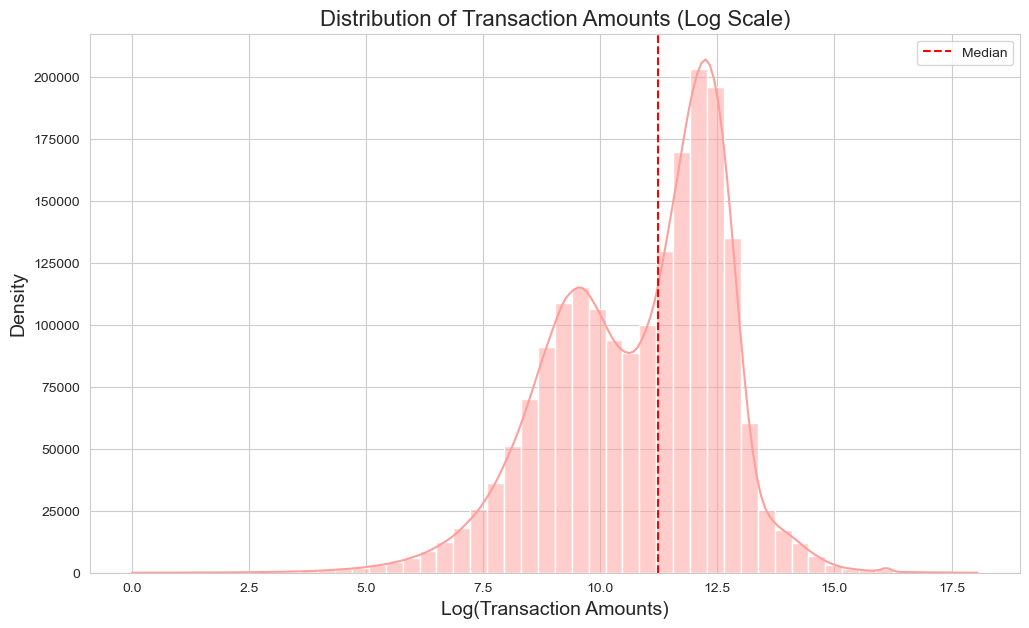

In [9]:
import numpy as np

plt.figure(figsize=(12,7))
sns.histplot(np.log1p(df['amount']), kde=True, bins=50, color=palette[3])
plt.title('Distribution of Transaction Amounts (Log Scale)', fontsize=16)
plt.xlabel('Log(Transaction Amounts)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.axvline(x=np.log1p(df['amount'].median()), color='red', linestyle='--', label='Median')
plt.legend()
plt.show()

##### Distribution of oldbalanceOrg and newbalanceOrig


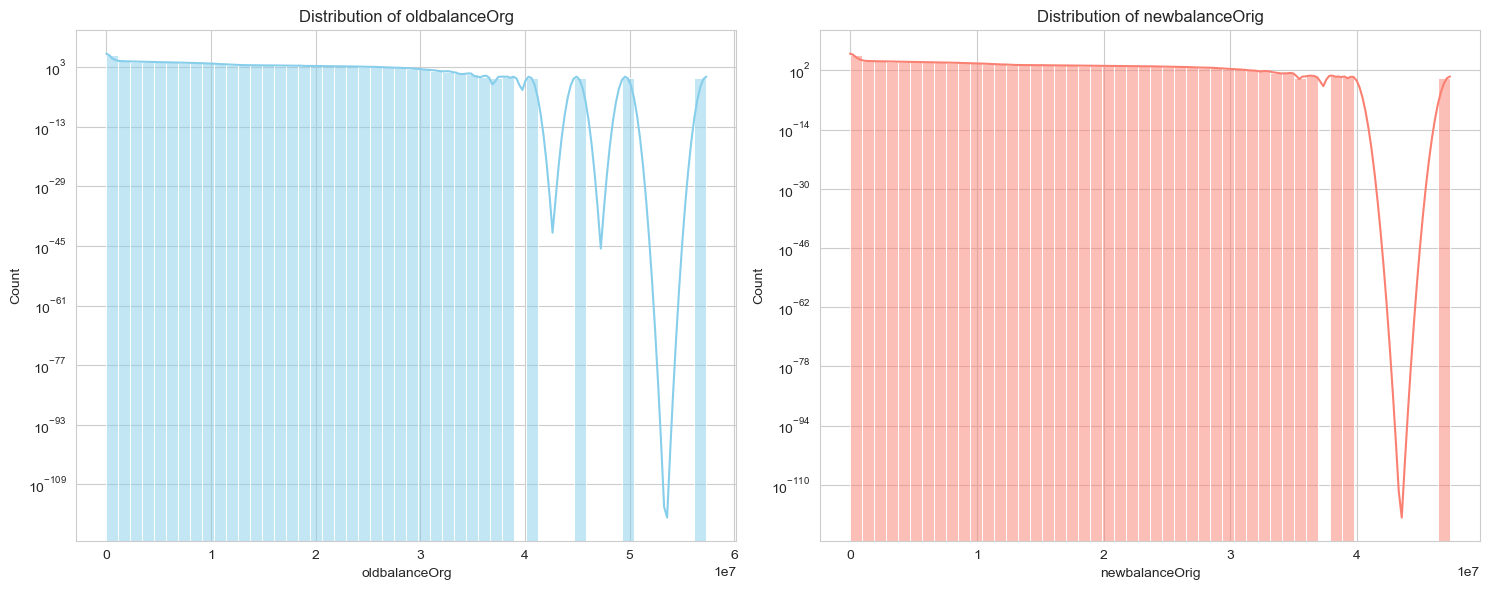

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of oldbalanceOrg and newbalanceOrig
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['oldbalanceOrg'], ax=axes[0], color='skyblue', kde=True, bins=50)
axes[0].set_title('Distribution of oldbalanceOrg')
axes[0].set_xlabel('oldbalanceOrg')
axes[0].set_ylabel('Count')
axes[0].set_yscale('log')

sns.histplot(df['newbalanceOrig'], ax=axes[1], color='salmon', kde=True, bins=50)
axes[1].set_title('Distribution of newbalanceOrig')
axes[1].set_xlabel('newbalanceOrig')
axes[1].set_ylabel('Count')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

##### Distribution of oldbalanceDest and newbalanceDest

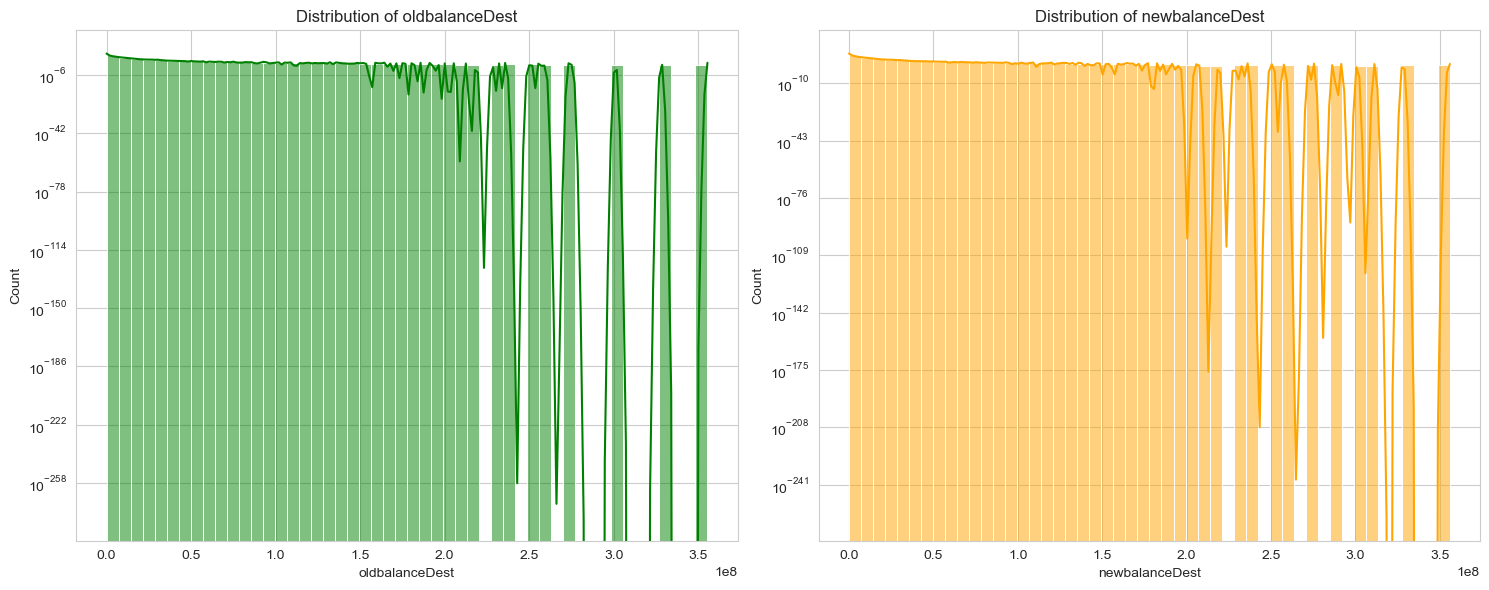

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['oldbalanceDest'], ax=axes[0], color='green', kde=True, bins=50)
axes[0].set_title('Distribution of oldbalanceDest')
axes[0].set_xlabel('oldbalanceDest')
axes[0].set_ylabel('Count')
axes[0].set_yscale('log')

sns.histplot(df['newbalanceDest'], ax=axes[1], color='orange', kde=True, bins=50)
axes[1].set_title('Distribution of newbalanceDest')
axes[1].set_xlabel('newbalanceDest')
axes[1].set_ylabel('Count')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

### 2.4 Handle Categorical Data

In [12]:
# Convert 'type' column to numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)
df_encoded.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,278,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0,0,0,0,0
264914,15,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0,0,0,1,0
85647,10,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0,0,0,0,0
5899326,403,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0,0,0,0,1
2544263,206,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0,0,0,0,0


### 2.5 Splitting Data into Training and Test Sets

In [13]:
from sklearn.model_selection import train_test_split

# Features (dropping target variable and string columns)
X = df_encoded.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)

# Target variable
y = df_encoded['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1527028, 11)
y_train shape: (1527028,)
X_test shape: (381758, 11)
y_test shape: (381758,)


### 2.5 Handle Imbalanced Data

In [16]:
# Checking the distribution of the 'isFraud' variable in the training set
class_distribution = y_train.value_counts(normalize=True)  # normalize=True gives proportions

print("Class distribution in y_train:")
print(class_distribution)

Class distribution in y_train:
0    0.99872
1    0.00128
Name: isFraud, dtype: float64


Since there's a significant difference between the proportions of the classes 0:0.99872 and 1:0.00128, then the target variable can be considered imbalanced and SMOTE technique will be used to balance it out.

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
# Checking the distribution before SMOTE
print("Class distribution before SMOTE in training data:")
print(y_train.value_counts())

# Checking the distribution after SMOTE
print("\nClass distribution after SMOTE in training data:")
print(y_train_resampled.value_counts())

Class distribution before SMOTE in training data:
0    1525074
1       1954
Name: isFraud, dtype: int64

Class distribution after SMOTE in training data:
0    1525074
1    1525074
Name: isFraud, dtype: int64


After applying SMOTE, we observe that the number of samples in the class isFraud=1 has increased to match the number of samples in class isFraud=0. This means the training data is now balanced in terms of the target variable.

## 3. Algorithms

### 3.1 Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Instantiate the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the resampled training data
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    381277
           1       0.01      0.90      0.03       481

    accuracy                           0.92    381758
   macro avg       0.51      0.91      0.49    381758
weighted avg       1.00      0.92      0.96    381758


Confusion Matrix:

[[349760  31517]
 [    49    432]]

ROC-AUC Score: 0.9077336056094282


The model does an impressive job in terms of recall for the fraudulent class, capturing almost 
90% of the fraudulent transactions. This is crucial in fraud detection, as failing to identify a fraudulent transaction (False Negative) can have severe consequences.

However, the precision for the fraudulent class is quite low, which means that while the model is capturing most frauds, it's also misclassifying a significant number of non-fraudulent transactions as fraudulent (False Positives). This could lead to a lot of false alarms, which in a real-world scenario might lead to unnecessary checks or actions on legitimate transactions.

The overall accuracy is high (
92
%
92%), but in the context of imbalanced datasets, accuracy can be misleading. The more relevant metrics here are precision, recall, and the F1-score, especially for the minority class (fraudulent transactions).

### 3.2 Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest model
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model on the resampled training data
rf_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Classification Report for Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    381277
           1       0.61      0.93      0.73       481

    accuracy                           1.00    381758
   macro avg       0.80      0.96      0.87    381758
weighted avg       1.00      1.00      1.00    381758


Confusion Matrix:

[[380987    290]
 [    35    446]]

ROC-AUC Score: 0.9632371626813988


The Random Forest classifier demonstrates a robust performance in the fraud detection task. The model not only captures a large majority of the actual fraudulent transactions but also maintains a good precision, resulting in fewer false alarms compared to the Logistic Regression model.

While the overall accuracy is near perfect, the more critical metrics for this problem are the precision and recall for the minority class (fraudulent transactions). The Random Forest model showcases a commendable balance between these metrics.

The false positives (290) are substantially reduced compared to the Logistic Regression model, leading to fewer legitimate transactions being flagged as suspicious.

A recall of 
92.72
%
92.72% for the fraudulent class is impressive, capturing most of the fraudulent activities. However, 35 fraudulent transactions were still missed, indicating there's room for further improvement.

### 3.3 Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Instantiate the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled training data
dt_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the model
print("Classification Report for Decision Trees:\n")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_dt))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_dt))

Classification Report for Decision Trees:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    381277
           1       0.56      0.94      0.70       481

    accuracy                           1.00    381758
   macro avg       0.78      0.97      0.85    381758
weighted avg       1.00      1.00      1.00    381758


Confusion Matrix:

[[380921    356]
 [    27    454]]

ROC-AUC Score: 0.971466619749889


The Decision Tree classifier demonstrates strong performance in fraud detection, especially when considering its interpretability advantage over more complex models like Random Forest.
While its precision for the fraudulent class is slightly lower than Random Forest, the Decision Tree model achieves a high recall, capturing a significant portion of the actual fraudulent transactions.
The total number of false positives (356) is slightly higher than the Random Forest model, which means there might be a few more legitimate transactions flagged as suspicious. However, the false negatives (27) are fewer than the Logistic Regression model, indicating fewer missed fraudulent transactions.

### 3.4 Bagging Classifier

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Bagging classifier with Decision Trees as the base classifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42
)

# Train the model on the resampled training data
bag_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_bag = bag_clf.predict(X_test)

# Evaluate the model
print("Classification Report for Bagging Classifier:\n")
print(classification_report(y_test, y_pred_bag))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_bag))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_bag))

Classification Report for Bagging Classifier:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    381277
           1       0.03      0.97      0.07       481

    accuracy                           0.96    381758
   macro avg       0.52      0.97      0.52    381758
weighted avg       1.00      0.96      0.98    381758


Confusion Matrix:

[[367927  13350]
 [    16    465]]

ROC-AUC Score: 0.9658610264836184


The Bagging Classifier demonstrates a high capability to detect fraudulent transactions, as indicated by the high recall and ROC-AUC score.
However, its precision for detecting fraud is notably low, which means while it catches most of the actual fraud cases, it also mislabels a significant number of legitimate transactions as fraudulent (False Positives). This might lead to unnecessary alerts and checks on genuine transactions, which can be inconvenient for customers and administrators.
The model's overall accuracy is still very high, but the cost of false positives in a fraud detection scenario can be significant. Hence, the trade-off between precision and recall needs careful consideration.
While Bagging reduces the variance in the predictions, in this case, it seems to have increased the number of false positives. This might be due to the high variability in the majority class, which gets sampled multiple times across different bags.

## 4. Comparison of the models

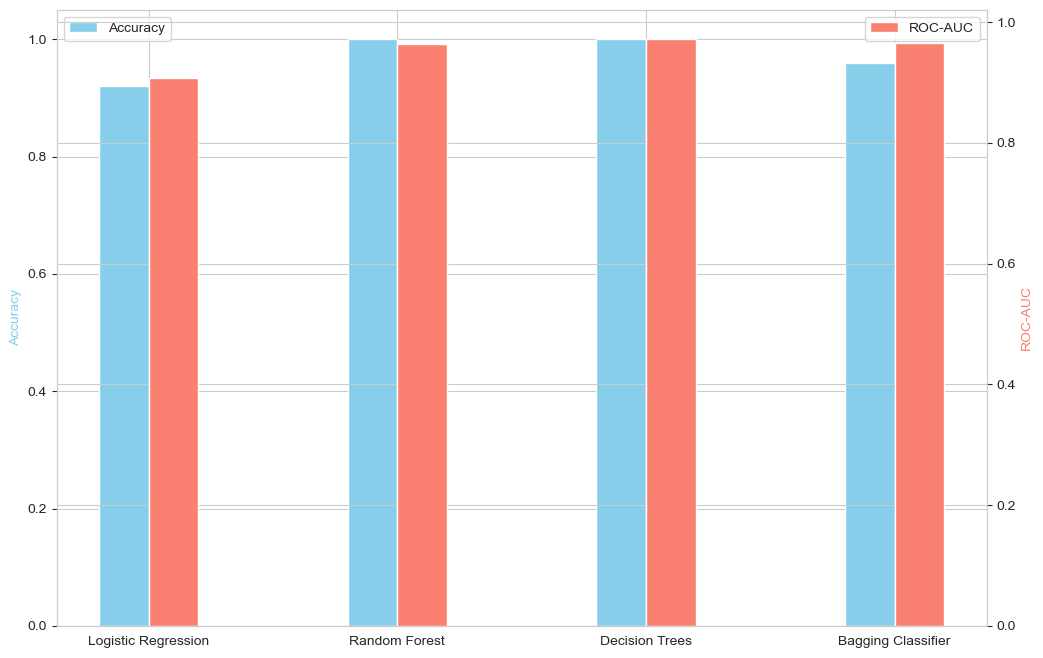

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Random Forest', 'Decision Trees', 'Bagging Classifier']

# Metrics for each model
accuracy = [0.92, 1.00, 1.00, 0.96]
precision_class_1 = [0.01, 0.61, 0.56, 0.03]
recall_class_1 = [0.90, 0.93, 0.94, 0.97]
f1_class_1 = [0.03, 0.73, 0.70, 0.07]
roc_auc = [0.9077, 0.9632, 0.9715, 0.9659]

# Plotting
x = np.arange(len(models))
width = 0.2

fig, ax1 = plt.subplots(figsize=(12, 8))

# Twin the axes for two different y-axes
ax2 = ax1.twinx()

ax1.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
ax2.bar(x + width/2, roc_auc, width, label='ROC-AUC', color='salmon')

# Set the y axis labels
ax1.set_ylabel('Accuracy', color='skyblue')
ax2.set_ylabel('ROC-AUC', color='salmon')

# Set the x axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=0)

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

- Logistic Regression: Offers a decent recall but has a very low precision for class 1, indicating it might be predicting too many false positives.
- Random Forest: Shows excellent performance across all metrics, especially in the ROC-AUC score, indicating it's distinguishing well between the classes.
- Decision Trees: Similar to Random Forest but with slightly lower precision.
- Bagging Classifier: Achieves a high recall but at the expense of precision, leading to many false positives.

## 5. Feature Importance

1. Logistic Regession

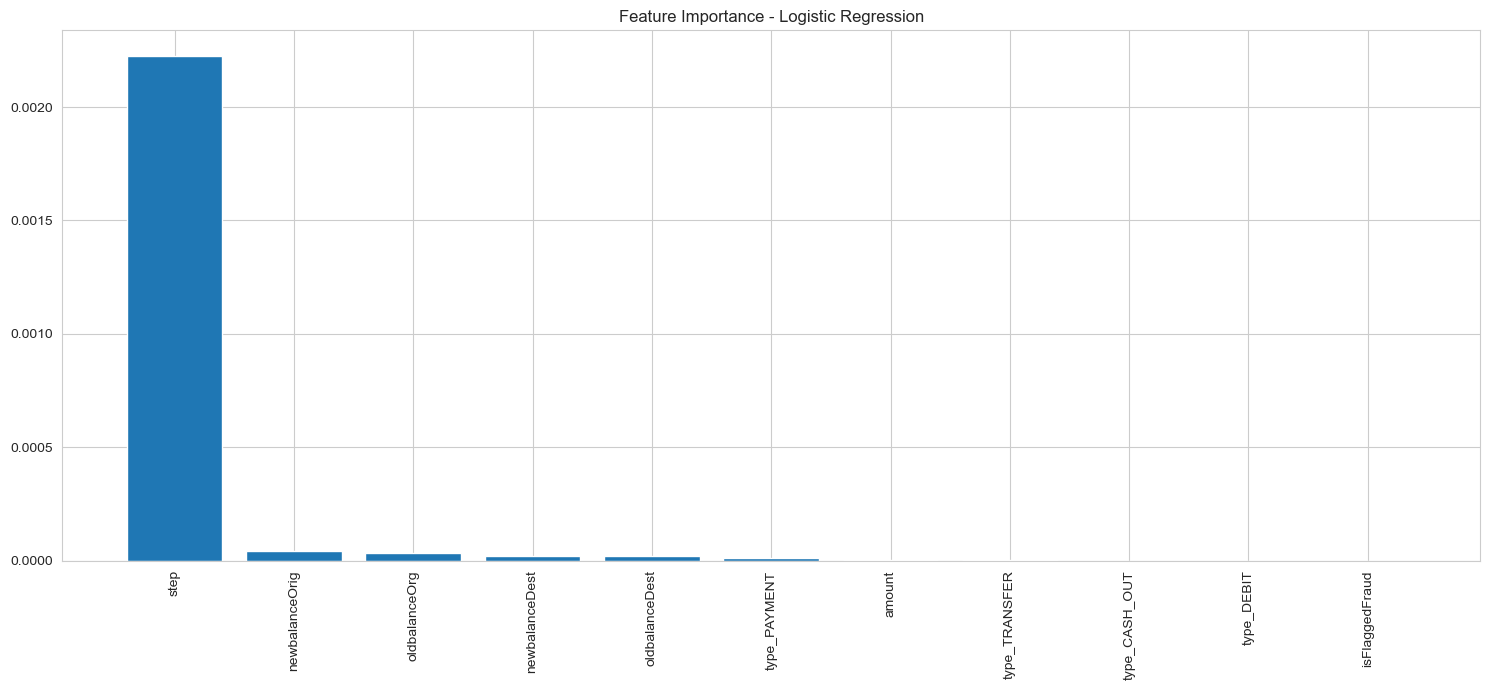

In [30]:
importances_logistic = abs(logreg.coef_[0])
indices_logistic = np.argsort(importances_logistic)[::-1]
plot_feature_importance(importances_logistic, indices_logistic, "Feature Importance - Logistic Regression")

2. Random Forest

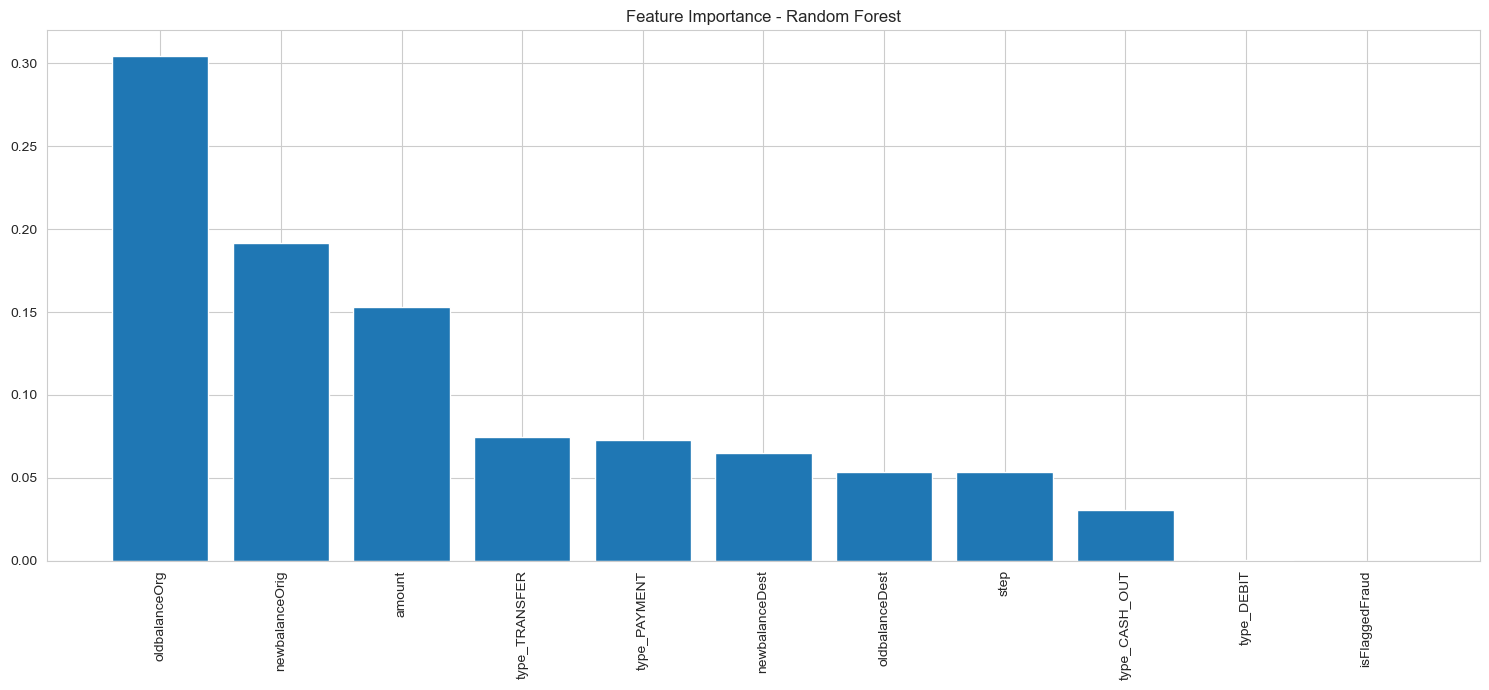

In [32]:
importances_rf = rf_clf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
plot_feature_importance(importances_rf, indices_rf, "Feature Importance - Random Forest")


3. Decision Trees:



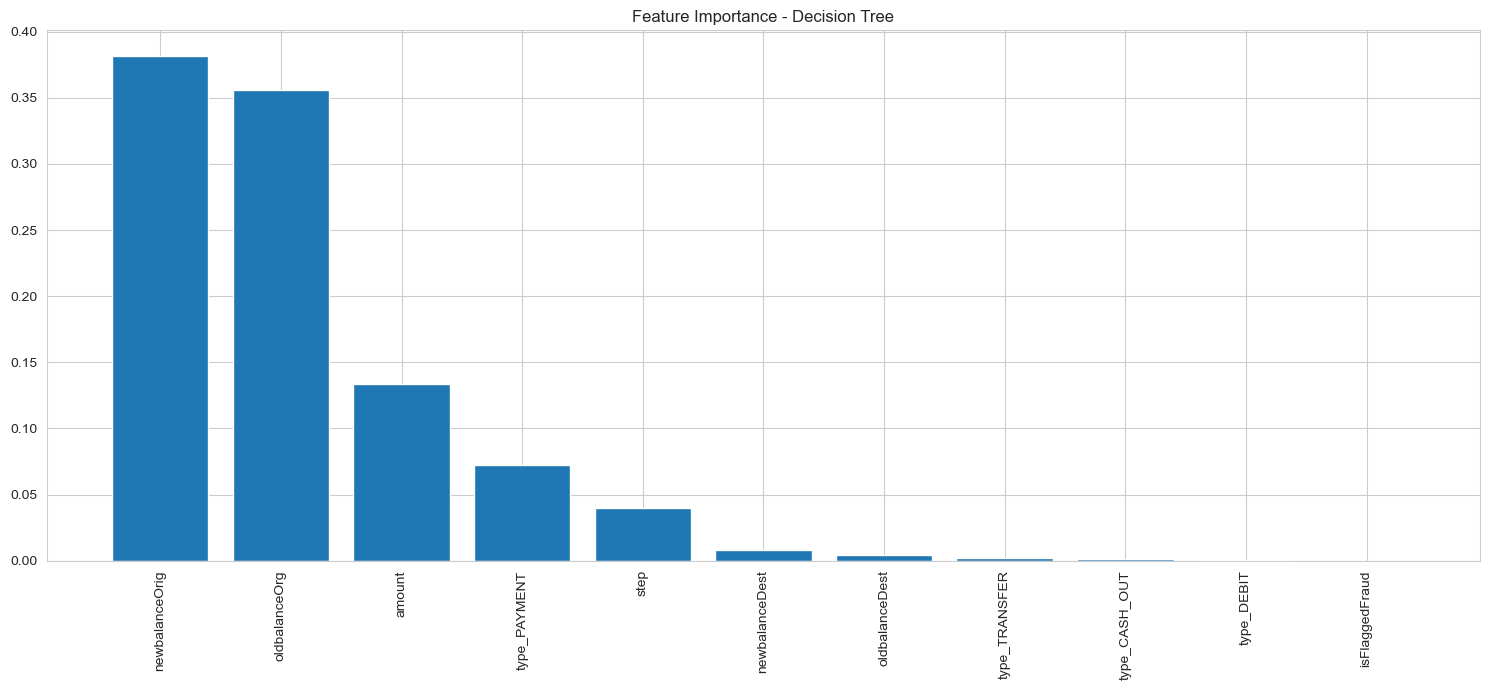

In [34]:
importances_dt = dt_clf.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]
plot_feature_importance(importances_dt, indices_dt, "Feature Importance - Decision Tree")

4. Bagging Classifier:



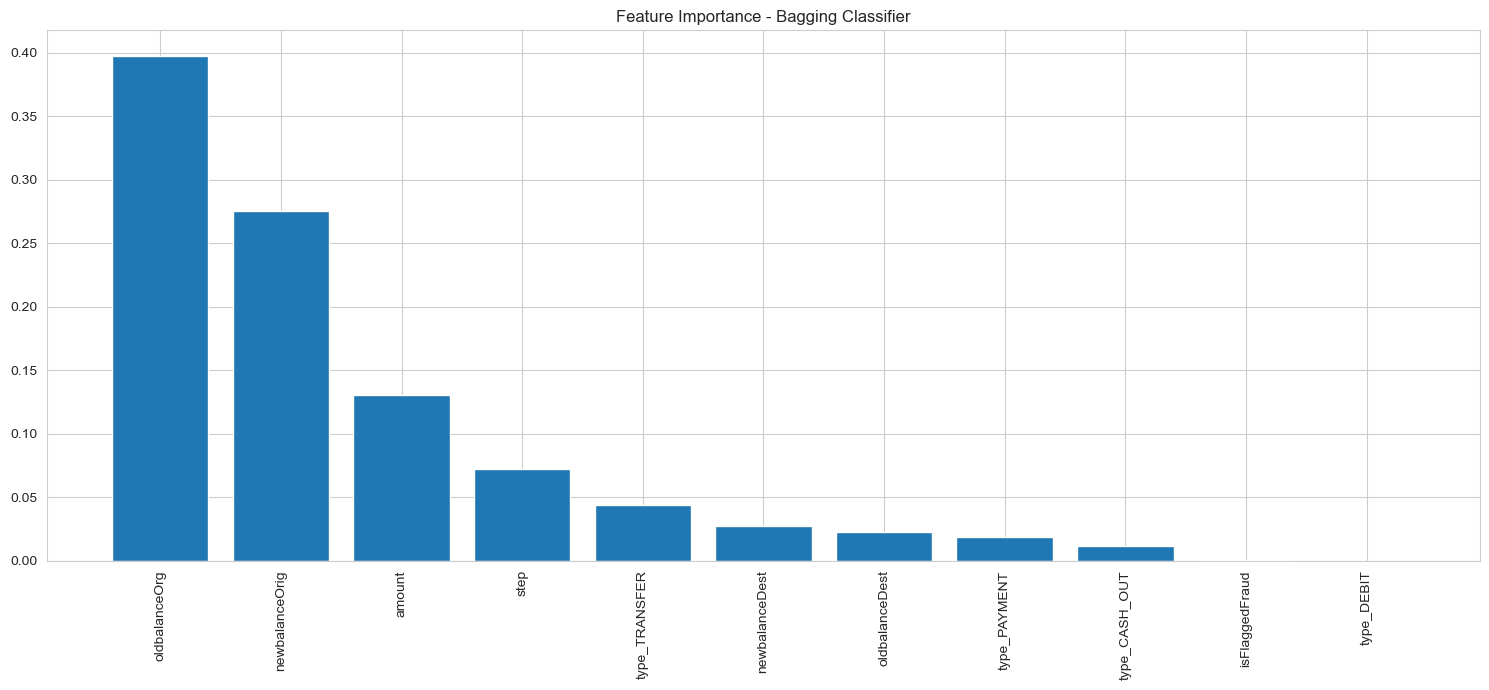

In [37]:
importances = np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis=0)
indices_bagging = np.argsort(importances)[::-1]
plot_feature_importance(importances, indices_bagging, "Feature Importance - Bagging Classifier")